In [2]:
import numpy as np
import matplotlib.pyplot as plt

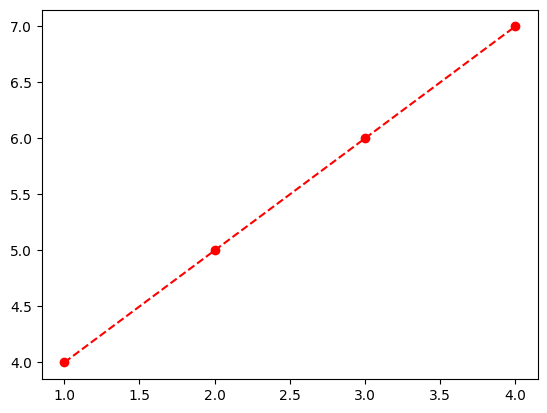

In [3]:
plt.plot(np.array([1,2,3,4]),np.array([4,5,6,7]),marker='o',linestyle='--',color='red');

In [4]:
rng=np.random.default_rng(seed=42)  # rng=random number generator
ber=rng.choice(a=[0,1],p=[0.3,0.7],size=1000)
# round(float(sum(ber)/len(ber)),2)

In [5]:
ber.shape

(1000,)

In [6]:
zero,one=ber.shape[0]-sum(ber),sum(ber)
zero,one

(np.int64(308), np.int64(692))

([<matplotlib.axis.YTick at 0x7deff022dc10>,
 [Text(0, 0, '0'), Text(0, 700, '700')])

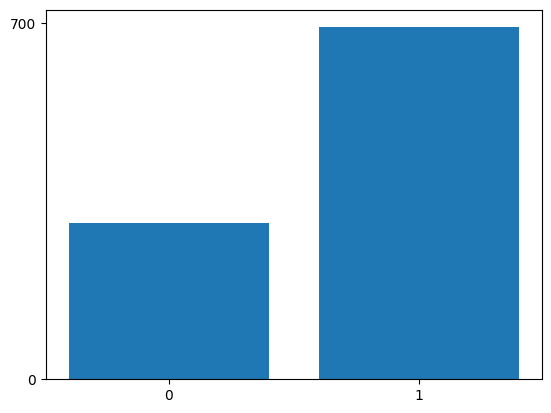

In [7]:
plt.bar([0,1],[zero,one])
plt.xticks([0,1])
plt.yticks([0,700])

(array([1.000e+00, 0.000e+00, 6.000e+00, 3.800e+01, 7.600e+01, 1.900e+02,
        4.610e+02, 8.070e+02, 1.156e+03, 1.580e+03, 1.687e+03, 1.494e+03,
        1.107e+03, 7.280e+02, 3.890e+02, 1.770e+02, 6.900e+01, 2.600e+01,
        7.000e+00, 1.000e+00]),
 array([-7.77822917, -6.93673531, -6.09524144, -5.25374758, -4.41225372,
        -3.57075986, -2.72926599, -1.88777213, -1.04627827, -0.2047844 ,
         0.63670946,  1.47820332,  2.31969718,  3.16119105,  4.00268491,
         4.84417877,  5.68567263,  6.5271665 ,  7.36866036,  8.21015422,
         9.05164809]),
 <BarContainer object of 20 artists>)

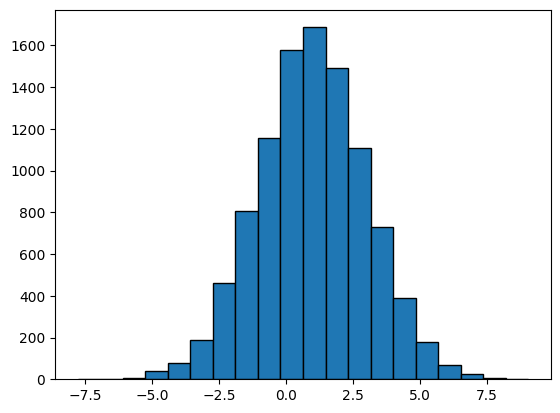

In [8]:
X=rng.normal(1,2,size=10000)
plt.hist(X,bins=20,edgecolor='black')

In [9]:
mu=np.array([1,2])
cov=np.array([[1,0],
              [0,5]])
X=rng.multivariate_normal(mu,cov,1000).T
X.shape

(2, 1000)

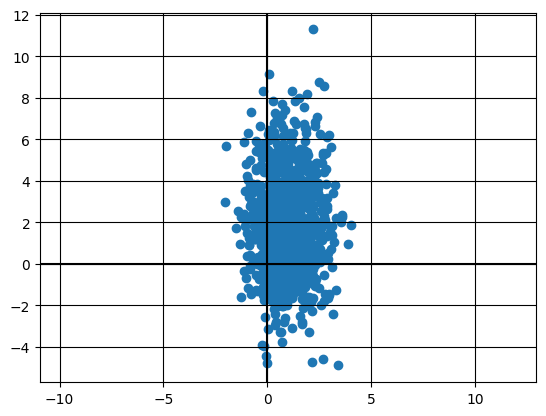

In [10]:
plt.scatter(X[0],X[1])
plt.axis('equal')
plt.grid(color='black')
plt.axhline(color='black')
plt.axvline(color='black')

In [11]:
d,n=X.shape
X_cen=X-X.mean(axis=1).reshape(d,1)
C=X@X.T/n
np.linalg.norm(C-cov)

np.float64(5.005510186803309)

In [12]:
def generate(n):
  X=rng.multivariate_normal(mu,cov,n).T
  return X

def sample(X):
  d,n=X.shape
  X_cen=X-X.mean(axis=1).reshape(d,1)
  C=X@X.T/n
  return C


In [13]:
mu=np.array([1,2])
cov=np.array([[1,0],
              [0,5]])


size_list=np.arange(1000,100_000,1000)
print(size_list)
norms=[]
T=10
for size in size_list:
  norm=0
  for i in range(T):
    X=generate(size)
    C=sample(X)
    norm+=np.linalg.norm(C-cov)
  norms.append(norm/T)
print(norms)

[ 1000  2000  3000  4000  5000  6000  7000  8000  9000 10000 11000 12000
 13000 14000 15000 16000 17000 18000 19000 20000 21000 22000 23000 24000
 25000 26000 27000 28000 29000 30000 31000 32000 33000 34000 35000 36000
 37000 38000 39000 40000 41000 42000 43000 44000 45000 46000 47000 48000
 49000 50000 51000 52000 53000 54000 55000 56000 57000 58000 59000 60000
 61000 62000 63000 64000 65000 66000 67000 68000 69000 70000 71000 72000
 73000 74000 75000 76000 77000 78000 79000 80000 81000 82000 83000 84000
 85000 86000 87000 88000 89000 90000 91000 92000 93000 94000 95000 96000
 97000 98000 99000]
[np.float64(5.414447667574777), np.float64(4.952570010135123), np.float64(4.897349265658688), np.float64(5.132747322710072), np.float64(5.005683792015463), np.float64(5.003474116590966), np.float64(4.998152979415555), np.float64(5.021982915682651), np.float64(5.030359916731195), np.float64(5.046085261263602), np.float64(5.048782119095835), np.float64(5.005210696074824), np.float64(5.0296597428

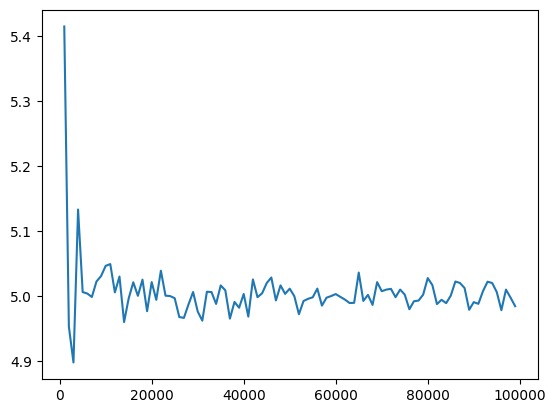

In [14]:
plt.plot(size_list,norms)

In [15]:
n=100_000
component=rng.choice([0,1,2],p=[0.2,0.3,0.5],size=n)
mus=np.array([0,5,10])
X=np.zeros(n)

for i in range(X.shape[0]):
  X[i]=rng.normal(mus[component[i]],1)

(array([  1.,   0.,   0.,   0.,   0.,   1.,   1.,   0.,   0.,   0.,   0.,
          0.,   1.,   1.,   1.,   1.,   0.,   0.,   0.,   1.,   1.,   0.,
          0.,   0.,   2.,   2.,   1.,   1.,   1.,   0.,   0.,   1.,   2.,
          2.,   0.,   2.,   0.,   0.,   1.,   4.,   2.,   1.,   2.,   3.,
          1.,   1.,   1.,   1.,   6.,   5.,   3.,   2.,  10.,   4.,   2.,
          1.,   4.,   4.,   3.,   7.,   4.,   6.,   5.,   3.,   3.,   5.,
          7.,   9.,  10.,  10.,  12.,   2.,  15.,   4.,   7.,  14.,   6.,
         11.,  13.,  14.,  15.,  18.,  12.,   8.,   8.,  13.,  11.,  11.,
         16.,  15.,  19.,  13.,  17.,  21.,  26.,  20.,  15.,  13.,  22.,
         24.,  23.,  27.,  21.,  26.,  32.,  44.,  34.,  29.,  39.,  31.,
         36.,  46.,  39.,  41.,  38.,  43.,  29.,  39.,  39.,  42.,  40.,
         54.,  45.,  45.,  49.,  51.,  37.,  51.,  50.,  55.,  54.,  52.,
         49.,  81.,  80.,  58.,  78.,  59.,  61.,  75.,  69.,  71.,  63.,
         79.,  77.,  71.,  80.,  88., 

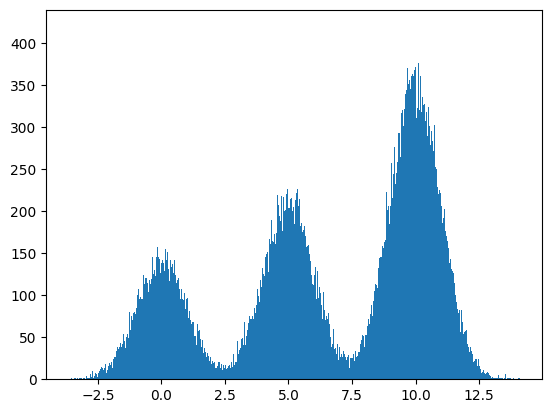

In [19]:
plt.hist(X,bins=1000)

In [36]:
x=np.array([1,2,3,4,5,6])
x.reshape(3,-1)

array([[1, 2],
       [3, 4],
       [5, 6]])

In [39]:
# broadcasting in python  will happpen bw a matrix and vector where thte col is same as the elemtns in arrays
# therefore we cant add column wise for that do this
b=np.array([1,2])
M=np.arange(1,7).reshape(2,3)

b.reshape(2,1)+M  # vvv important

array([[2, 3, 4],
       [6, 7, 8]])

In [42]:
X=np.array([1,2,3,4,5,6])
X[[1,2,3]]

array([2, 3, 4])

In [46]:
M=np.arange(1,101).reshape(20,5)
M[0::2] # row wise

array([[ 1,  2,  3,  4,  5],
       [11, 12, 13, 14, 15],
       [21, 22, 23, 24, 25],
       [31, 32, 33, 34, 35],
       [41, 42, 43, 44, 45],
       [51, 52, 53, 54, 55],
       [61, 62, 63, 64, 65],
       [71, 72, 73, 74, 75],
       [81, 82, 83, 84, 85],
       [91, 92, 93, 94, 95]])

In [47]:
M[:,1::2]

array([[ 2,  4],
       [ 7,  9],
       [12, 14],
       [17, 19],
       [22, 24],
       [27, 29],
       [32, 34],
       [37, 39],
       [42, 44],
       [47, 49],
       [52, 54],
       [57, 59],
       [62, 64],
       [67, 69],
       [72, 74],
       [77, 79],
       [82, 84],
       [87, 89],
       [92, 94],
       [97, 99]])

In [74]:
x=np.array([[3,1,5,-4,-2,1,5]])
X[X>0]

array([1, 2, 3, 4, 5, 6])

In [75]:
def ReLU(x):
  return np.where(x>=0,x,0)
x=ReLU(x)
x

array([[3, 1, 5, 0, 0, 1, 5]])

In [87]:
A=np.arange(1,13).reshape(2,-1)
A.sum(axis=0),A,A.sum(axis=1)

(array([ 8, 10, 12, 14, 16, 18]),
 array([[ 1,  2,  3,  4,  5,  6],
        [ 7,  8,  9, 10, 11, 12]]),
 array([21, 57]))

In [88]:
A.mean(axis=1),A.var(axis=1),np.diag(A).sum()

(array([3.5, 9.5]), array([2.91666667, 2.91666667]), np.int64(9))

In [92]:
B=np.arange

'2'